In [1]:
import xarray as xr, numpy as np, metpy.calc as mpcalc
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.units import units
import cartopy.crs as ccrs 
import cartopy.feature as cfeature
import json

In [2]:
vor=xr.open_dataset('./data/vor.grib', engine='cfgrib')
vor=vor.metpy.quantify()
vor = vor.rename({"isobaricInhPa": "pressure", "latitude": "lat", "longitude": "lon"})
vor

<xarray.Dataset>
Dimensions:     (time: 240, pressure: 7, lat: 721, lon: 1440)
Coordinates:
    number      int64 0
  * time        (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2019-12-01
    step        timedelta64[ns] 00:00:00
  * pressure    (pressure) float64 400.0 350.0 300.0 250.0 200.0 150.0 100.0
  * lat         (lat) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * lon         (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2019-12-01
Data variables:
    pv          (time, pressure, lat, lon) float32 <Quantity([[[[ 1.19517972e...
    vo          (time, pressure, lat, lon) float32 <Quantity([[[[ 9.92040441e...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2023-03-26T13:33 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
QBO = 0
with open("QBO.json") as f:
    QBO = json.loads(f.read())
QBO.get("2000")
negative = {}
positive = {}
normal = {}
plot = {}
for year in QBO:
    negative[int(year)] = []
    positive[int(year)] = []
    normal[int(year)] = []
    for month in QBO[year]:
        plot[float(year) + (float(month)-1)/12] = QBO[year][month]
        if QBO[year][month] >= 10:
            positive[int(year)].append(int(month))
        if QBO[year][month] <= -15:
            negative[int(year)].append(int(month))
        if QBO[year][month] <= 5 and QBO[year][month] >= -5:
            normal[int(year)].append(int(month))

positive, negative

({2000: [],
  2001: [],
  2002: [4, 5, 6, 7, 8],
  2003: [],
  2004: [4, 5, 6],
  2005: [],
  2006: [5, 6, 7, 9, 10, 11],
  2007: [],
  2008: [5, 6, 7, 8, 9, 10, 12],
  2009: [1, 2, 3],
  2010: [10, 11, 12],
  2011: [2, 3, 4, 5],
  2012: [],
  2013: [5, 6, 7, 8, 9, 10, 11, 12],
  2014: [1, 2, 3],
  2015: [8, 9, 10, 11, 12],
  2016: [8, 9, 10, 11, 12],
  2017: [1, 2, 3, 4],
  2018: [],
  2019: [3, 4, 5, 6, 7]},
 {2000: [8, 9, 11],
  2001: [1, 2, 3, 4, 5, 6, 7, 8],
  2002: [],
  2003: [6, 7, 8, 9, 10, 11],
  2004: [],
  2005: [5, 6, 7, 8, 9, 10, 11, 12],
  2006: [1],
  2007: [6, 7, 8, 9, 10, 11, 12],
  2008: [],
  2009: [12],
  2010: [1, 2, 3, 4, 5, 6],
  2011: [12],
  2012: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
  2013: [],
  2014: [7, 8, 9, 10, 11, 12],
  2015: [1, 2, 3, 4],
  2016: [],
  2017: [9, 10, 11, 12],
  2018: [1, 2, 3, 4, 5, 6, 7, 8],
  2019: []})

Text(0.5, 0.98, 'Zonal vorticity mean for QBO easterly and westerly')

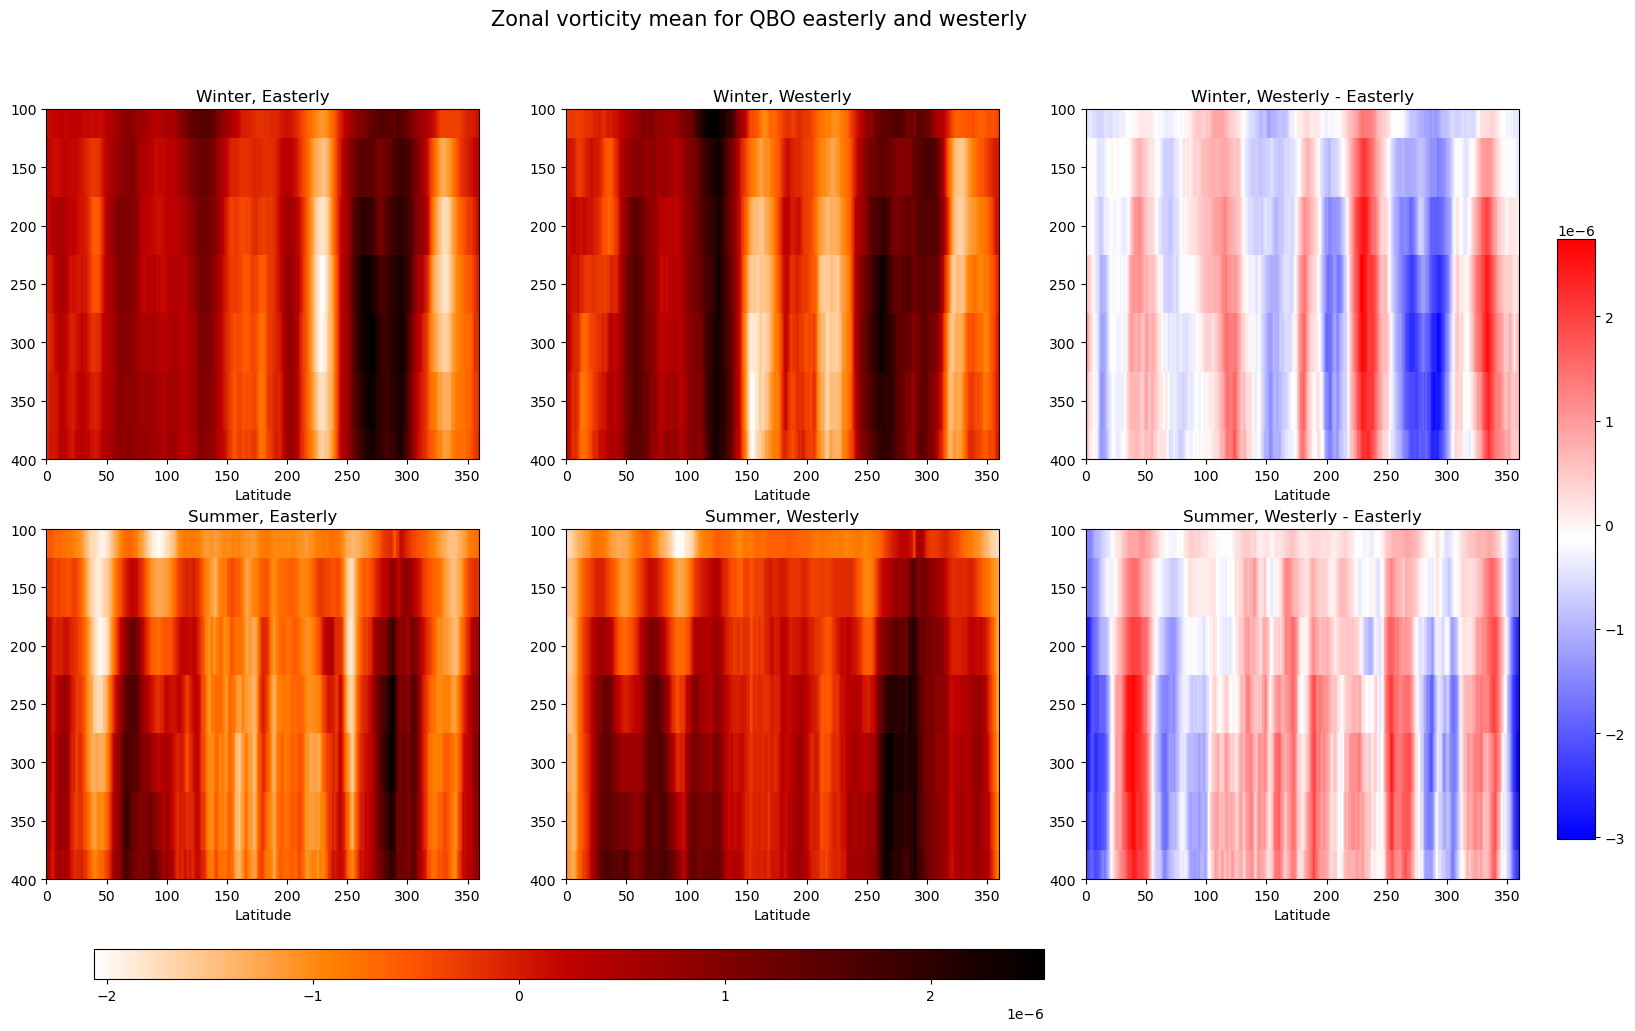

In [33]:
DJFp = []
DJFn = []
DJFh = [] #QBO normal
JJAp = []
JJAn = []
JJAh = [] #QBO normal

delay = 0
DJF = [1,11,12]
JJA = [6, 7, 8]
DJF = [(i+delay)%12 if (i+delay)!=12 else i+delay for i in DJF]
JJA = [(j+delay)%12 if (j+delay)!=12 else j+delay for j in JJA]

for year in positive:
    if positive[year] == []:
        continue

    for i in positive[year]:
        adding = (i+delay)%12 if (i+delay)!=12 else i+delay
        if adding in DJF:
            if adding//10 == 0:
                DJFp.append(f"{year}-0{adding}")
            else:
                DJFp.append(f"{year}-{adding}")
        if adding in JJA:
            if adding//10 == 0:
                JJAp.append(f"{year}-0{adding}")
            else: 
                JJAp.append(f"{year}-{adding}")

    if negative[year] == []:
        continue

    for j in negative[year]:
        adding = (j+delay)%12 if (j+delay)!=12 else j+delay
        if adding in DJF:
            if adding//10 == 0:
                DJFn.append(f"{year}-0{adding}")
            else:
                DJFn.append(f"{year}-{adding}")
        if adding in JJA:
            if adding//10 == 0:
                JJAn.append(f"{year}-0{adding}")
            else: 
                JJAn.append(f"{year}-{adding}")

    if normal[year] == []:
        continue

    for h in normal[year]:
        adding = (h+delay)%12 if (h+delay)!=12 else h+delay
        if adding in DJF:
            if adding//10 == 0:
                DJFh.append(f"{year}-0{adding}")
            else:
                DJFh.append(f"{year}-{adding}")
        if adding in JJA:
            if adding//10 == 0:
                JJAh.append(f"{year}-0{adding}")
            else: 
                JJAh.append(f"{year}-{adding}")


uVo = vor.vo
winterE = []
winterW = []
summerE = []
summerW = []
for year in uVo.time.values:
    if str(year)[:7] in DJFn:
        winterE.append(uVo.sel(time = year))
    if str(year)[:7] in DJFp:
        winterW.append(uVo.sel(time = year))
    if str(year)[:7] in JJAn:
        summerE.append(uVo.sel(time = year))
    if str(year)[:7] in JJAp:
        summerW.append(uVo.sel(time = year))

voWE = xr.concat(winterE, dim="time")
voWW = xr.concat(winterW, dim="time")

umeanWE = voWE.mean(dim = ['time', 'lat'])
umeanWW = voWW.mean(dim = ['time', 'lat'])

voSE = xr.concat(summerE, dim="time")
voSW = xr.concat(summerW, dim="time")

umeanSE = voSE.mean(dim = ['time', 'lat'])
umeanSW = voSW.mean(dim = ['time', 'lat'])

umeanWdiff = umeanWW - umeanWE
umeanSdiff = umeanSW - umeanSE

fig, axes = plt.subplots(2,3, figsize = (19, 10))
cs1 = axes[0, 0].pcolormesh(umeanWE.lon, umeanWE.pressure, umeanWE.values, cmap = plt.cm.gist_heat_r)
axes[0, 0].set(
    title = "Winter, Easterly",
    xlabel = "Latitude",
    ylim = (400, 100))
cs2 = axes[0, 1].pcolormesh(umeanWW.lon, umeanWW.pressure, umeanWW.values, cmap = plt.cm.gist_heat_r)
axes[0, 1].set(
    title = "Winter, Westerly",
    xlabel = "Latitude",
     ylim = (400, 100))
cs3 = axes[1, 0].pcolormesh(umeanSE.lon, umeanSE.pressure, umeanSE.values, cmap = plt.cm.gist_heat_r)
axes[1, 0].set(
    title = "Summer, Easterly",
    xlabel = "Latitude",
    ylim = (400, 100))
cs4 = axes[1, 1].pcolormesh(umeanSW.lon, umeanSW.pressure, umeanSW.values, cmap = plt.cm.gist_heat_r)
axes[1, 1].set(
    title = "Summer, Westerly",
    xlabel = "Latitude",
     ylim = (400, 100))

cs5 = axes[0, 2].pcolormesh(umeanWdiff.lon, umeanWdiff.pressure, umeanWdiff.values, cmap = plt.cm.bwr)
axes[0, 2].set(
    title = "Winter, Westerly - Easterly",
    xlabel = "Latitude",
    ylim = (400, 100))
cs6 = axes[1, 2].pcolormesh(umeanSdiff.lon, umeanSdiff.pressure, umeanSdiff.values, cmap = plt.cm.bwr)
axes[1, 2].set(
    title = "Summer, Westerly - Easterly",
    xlabel = "Latitude",
     ylim = (400, 100))

cbar_ax = fig.add_axes([0.15, 0.01, 0.5, 0.03])
clb=plt.colorbar(cs2,orientation='horizontal', cax=cbar_ax)

cbar_ax2 = fig.add_axes([0.92, 0.15, 0.02, 0.6])
clb2=plt.colorbar(cs6,orientation='vertical', cax=cbar_ax2)
plt.suptitle("Zonal vorticity mean for QBO easterly and westerly",fontsize = 15)

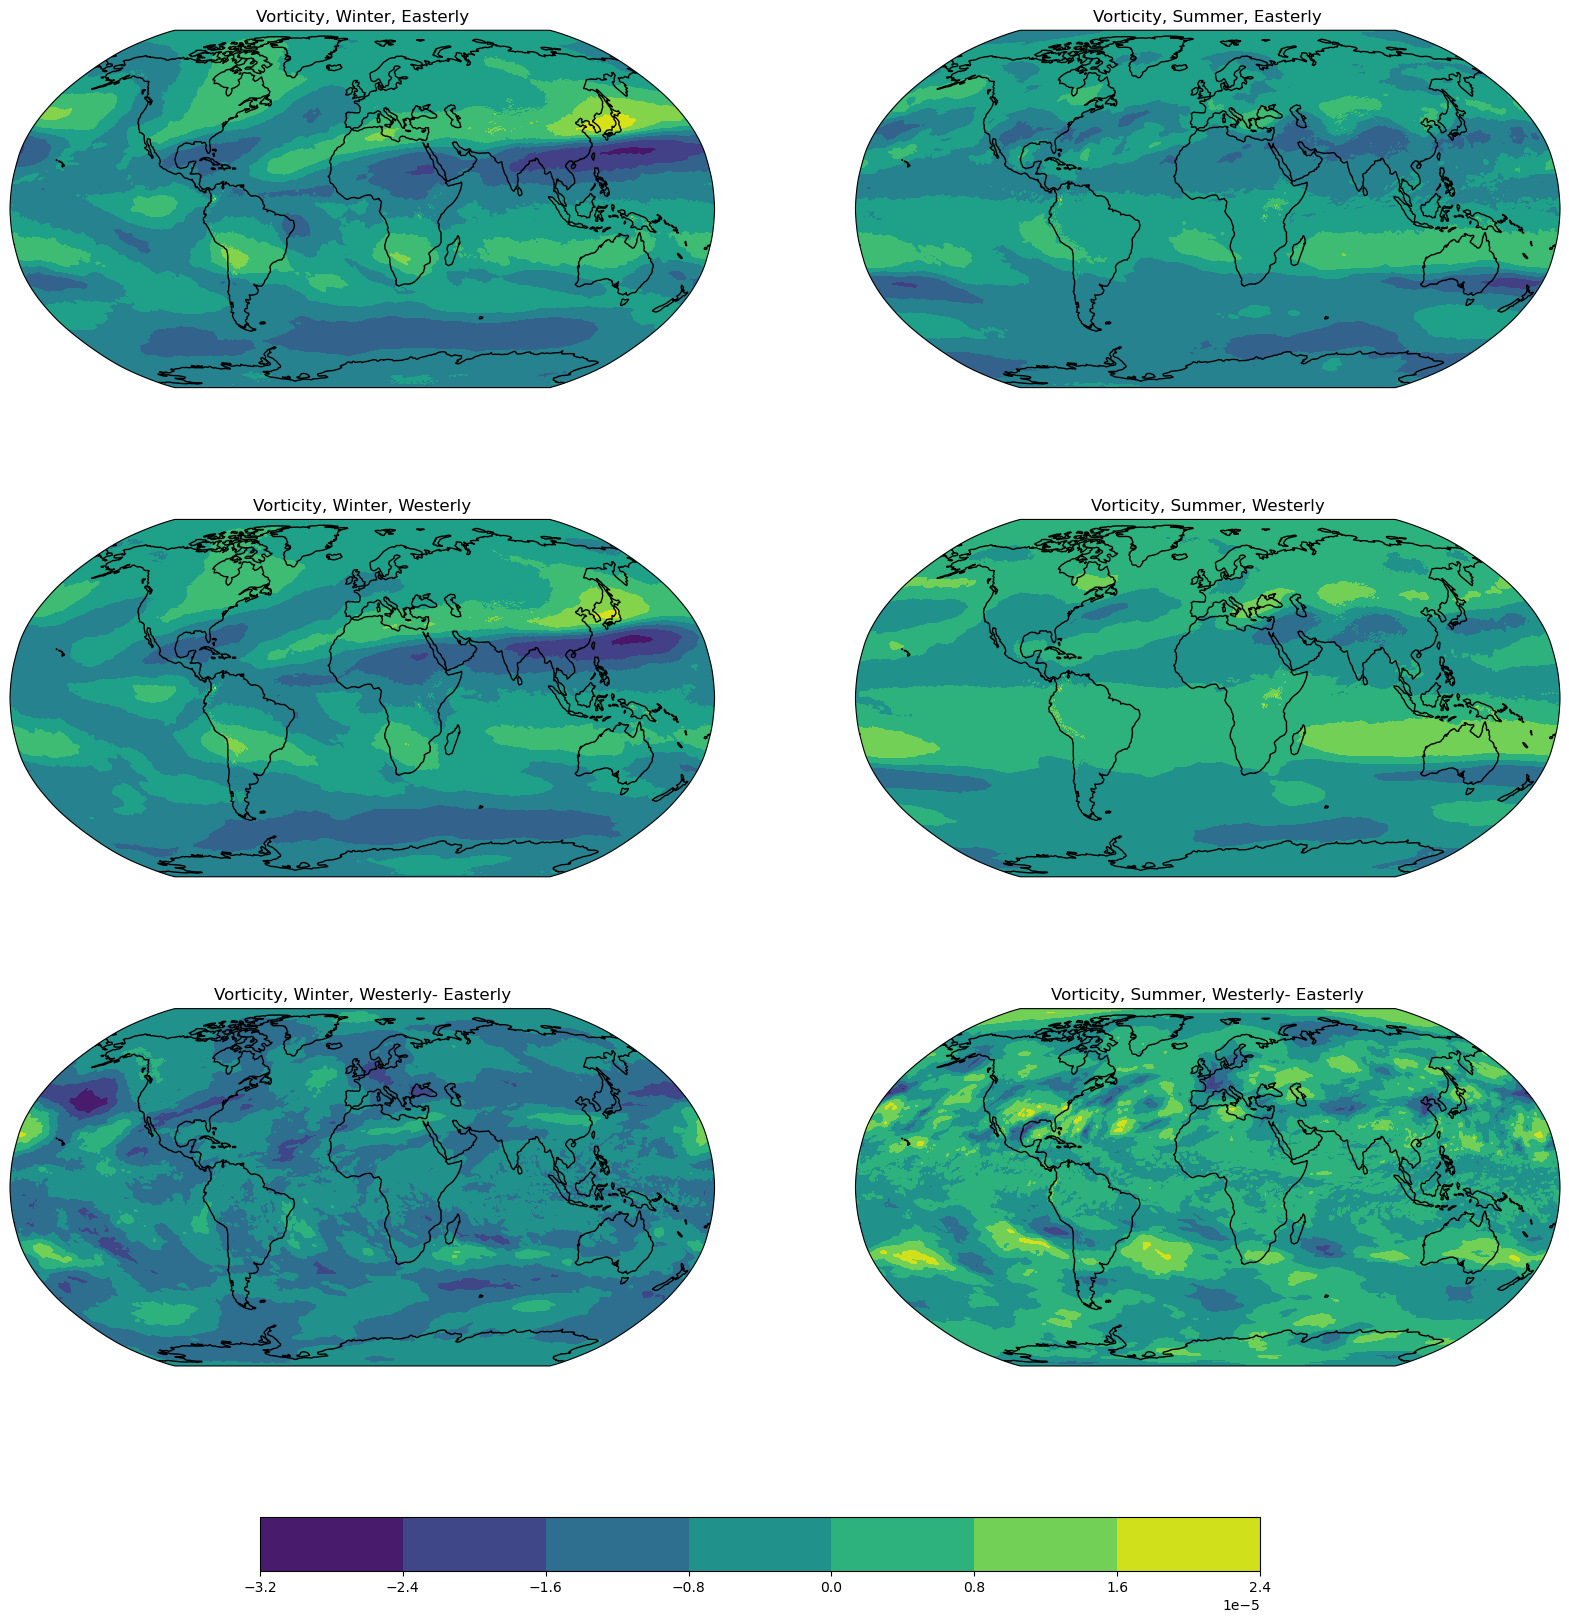

In [40]:
voWE200= voWE.sel(pressure = 200).mean("time")
voWW200= voWW.sel(pressure = 200).mean("time")
voSE200= voSE.sel(pressure = 200).mean("time")
voSW200= voSW.sel(pressure = 200).mean("time")
voWdiff200 = voWW200 - voWE200
voSdiff200 = voSW200 - voSE200

fig, axes = plt.subplots(3,2, figsize = (20, 18), subplot_kw={"projection": ccrs.Robinson()})

axes[0,0].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[0,0].coastlines(color='k')
axes[0,0].contourf(voWE200.lon, voWE200.lat, voWE200.values, transform = ccrs.PlateCarree())
axes[0,0].set_title("Vorticity, Winter, Easterly")

axes[1,0].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[1,0].coastlines(color='k')
axes[1,0].contourf(voWW200.lon, voWW200.lat, voWW200.values, transform = ccrs.PlateCarree())
axes[1,0].set_title("Vorticity, Winter, Westerly")

axes[2,0].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[2,0].coastlines(color='k')
axes[2,0].contourf(voWdiff200.lon, voWdiff200.lat, voWdiff200.values, transform = ccrs.PlateCarree())
axes[2,0].set_title("Vorticity, Winter, Westerly- Easterly")

axes[0,1].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[0,1].coastlines(color='k')
axes[0,1].contourf(voSE200.lon, voSE200.lat, voSE200.values, transform = ccrs.PlateCarree())
axes[0,1].set_title("Vorticity, Summer, Easterly")

axes[1,1].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[1,1].coastlines(color='k')
axes[1,1].contourf(voSW200.lon, voSW200.lat, voSW200.values, transform = ccrs.PlateCarree())
axes[1,1].set_title("Vorticity, Summer, Westerly")

axes[2,1].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[2,1].coastlines(color='k')
cs1 = axes[2,1].contourf(voSdiff200.lon, voSdiff200.lat, voSdiff200.values, transform = ccrs.PlateCarree())
axes[2,1].set_title("Vorticity, Summer, Westerly- Easterly")

cbar_ax = fig.add_axes([0.25, 0.01, 0.5, 0.03])
clb=plt.colorbar(cs1,orientation='horizontal', cax=cbar_ax)

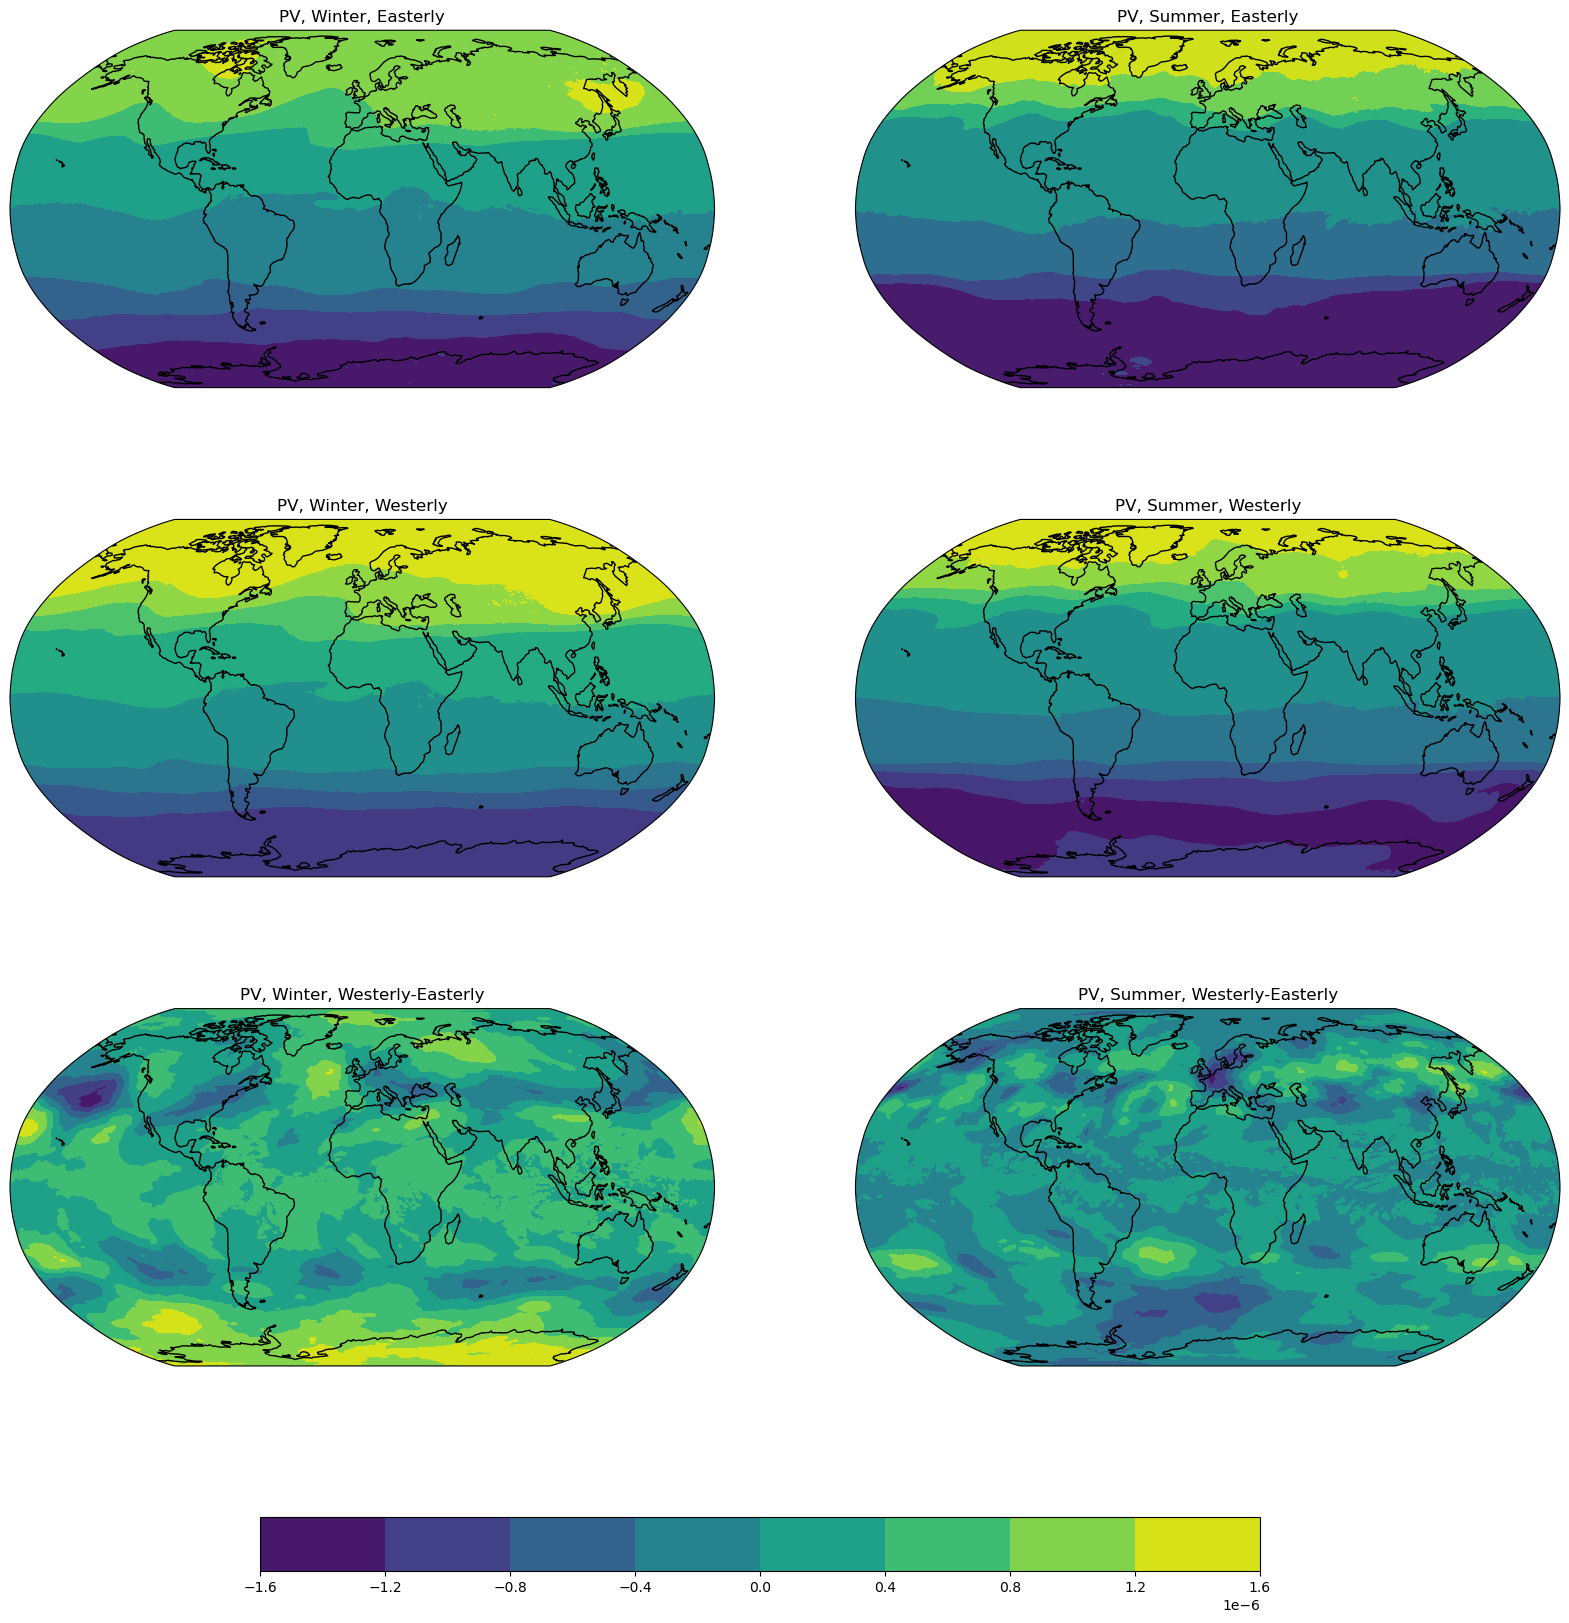

In [41]:
Pv = vor.pv
winterE = []
winterW = []
summerE = []
summerW = []
for year in Pv.time.values:
    if str(year)[:7] in DJFn:
        winterE.append(Pv.sel(time = year))
    if str(year)[:7] in DJFp:
        winterW.append(Pv.sel(time = year))
    if str(year)[:7] in JJAn:
        summerE.append(Pv.sel(time = year))
    if str(year)[:7] in JJAp:
        summerW.append(Pv.sel(time = year))

pvWE = xr.concat(winterE, dim="time").sel(pressure = 200).mean("time")
pvWW = xr.concat(winterW, dim="time").sel(pressure = 200).mean("time")

pvSE = xr.concat(summerE, dim="time").sel(pressure = 200).mean("time")
pvSW = xr.concat(summerW, dim="time").sel(pressure = 200).mean("time")

pvWdiff = pvWW - pvWE
pvSdiff = pvSW - pvSE

fig, axes = plt.subplots(3,2, figsize = (20, 18), subplot_kw={"projection": ccrs.Robinson()})

axes[0,0].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[0,0].coastlines(color='k')
axes[0,0].contourf(pvWE.lon, pvWE.lat, pvWE.values, transform = ccrs.PlateCarree())
axes[0,0].set_title("PV, Winter, Easterly")

axes[1,0].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[1,0].coastlines(color='k')
axes[1,0].contourf(pvWW.lon, pvWW.lat, pvWW.values, transform = ccrs.PlateCarree())
axes[1,0].set_title("PV, Winter, Westerly")

axes[2,0].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[2,0].coastlines(color='k')
axes[2,0].contourf(pvWdiff.lon, pvWdiff.lat, pvWdiff.values, transform = ccrs.PlateCarree())
axes[2,0].set_title("PV, Winter, Westerly-Easterly")

axes[0,1].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[0,1].coastlines(color='k')
axes[0,1].contourf(pvSE.lon, pvSE.lat, pvSE.values, transform = ccrs.PlateCarree())
axes[0,1].set_title("PV, Summer, Easterly")

axes[1,1].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[1,1].coastlines(color='k')
axes[1,1].contourf(pvSW.lon, pvSW.lat, pvSW.values, transform = ccrs.PlateCarree())
axes[1,1].set_title("PV, Summer, Westerly")

axes[2,1].add_feature(cfeature.LAND, facecolor='0.8')
countries=cfeature.NaturalEarthFeature(category="cultural", scale="110m", 
                                    facecolor="none", name="admin_0_boundary_lines_land")
axes[2,1].coastlines(color='k')
cs1 = axes[2,1].contourf(pvSdiff.lon, pvSdiff.lat, pvSdiff.values, transform = ccrs.PlateCarree())
axes[2,1].set_title("PV, Summer, Westerly-Easterly")

cbar_ax = fig.add_axes([0.25, 0.01, 0.5, 0.03])
clb=plt.colorbar(cs1,orientation='horizontal', cax=cbar_ax)